# Datasets

In [1]:
from torchhk.datasets import *

## 1. w/o Validation Set

In [2]:
mnist = Datasets("MNIST", root='./data', val_idx=None, label_filter=None,
                 transform_train=transforms.ToTensor(), 
                 transform_test=transforms.ToTensor())

Data Loaded!
Train Data Length : 60000
Test Data Length : 10000


In [3]:
train_data, test_data = mnist.get_data()
train_len, test_len = mnist.get_len()
train_loader, test_loader = mnist.get_loader(batch_size=100)

print("------------------------")
print(mnist.data_name)
print("------------------------")
print("[Train]")
print("* Data :", train_data)
print("* Length :", train_len)
print("* Loader :", train_loader)
print("------------------------")
print("[Test]")
print("* Data :", test_data)
print("* Length :", test_len)
print("* Loader :", test_loader)

------------------------
MNIST
------------------------
[Train]
* Data : Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
* Length : 60000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001BFA83506A0>
------------------------
[Test]
* Data : Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()
* Length : 10000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001BFA8350710>


## 2. w/ Validation Set

In [4]:
mnist_val = Datasets("MNIST", val_idx=list(range(50000, 60000)), label_filter=None,
                     transform_train=transforms.ToTensor(), 
                     transform_test=transforms.ToTensor(), 
                     transform_val=transforms.ToTensor())

Data Loaded (w/ Validation Set)!
Train Data Length : 50000
Val Data Length : 10000
Test Data Length : 10000


In [5]:
train_data, val_data, test_data = mnist_val.get_data()
train_len, val_len, test_len = mnist_val.get_len()
train_loader, val_loader, test_loader = mnist_val.get_loader(batch_size=100)

print("------------------------")
print(mnist.data_name)
print("------------------------")
print("[Train]")
print("* Data :", train_data)
print("* Length :", train_len)
print("* Loader :", train_loader)
print("------------------------")
print("[Val]")
print("* Data :", val_data)
print("* Length :", val_len)
print("* Loader :", val_loader)
print("------------------------")
print("[Test]")
print("* Data :", test_data)
print("* Length :", test_len)
print("* Loader :", test_loader)

------------------------
MNIST
------------------------
[Train]
* Data : <torch.utils.data.dataset.Subset object at 0x000001BFA8334D68>
* Length : 50000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001BFAF0499E8>
------------------------
[Val]
* Data : <torch.utils.data.dataset.Subset object at 0x000001BFA8334EB8>
* Length : 10000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001BFAF049A58>
------------------------
[Test]
* Data : Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()
* Length : 10000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001BFAF049B00>


## 3. Label Filtering

In [6]:
# (1) Filter images whose label is in {0(airplane),1(automobile),7(horse)}
# (2) Change the label {0,1,7} to {0,1,2}
mnist = Datasets("CIFAR10", val_idx=None, label_filter={0:0, 1:1, 7:2},
                 transform_train=transforms.ToTensor(), 
                 transform_test=transforms.ToTensor(), 
                 transform_val=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified
Data Loaded! (w/ Label Filtering)
Train Data Length : 15000
Test Data Length : 3000


In [7]:
train_data, test_data = mnist.get_data()
train_len, test_len = mnist.get_len()
train_loader, test_loader = mnist.get_loader(batch_size=5)

print("------------------------")
print(mnist.data_name)
print("------------------------")
print("[Train]")
print("* Data :", train_data)
print("* Length :", train_len)
print("* Loader :", train_loader)
print("------------------------")
print("[Test]")
print("* Data :", test_data)
print("* Length :", test_len)
print("* Loader :", test_loader)

------------------------
CIFAR10
------------------------
[Train]
* Data : <torch.utils.data.dataset.Subset object at 0x000001BFA8334B38>
* Length : 15000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001BFAF049828>
------------------------
[Test]
* Data : <torch.utils.data.dataset.Subset object at 0x000001BFA83349B0>
* Length : 3000
* Loader : <torch.utils.data.dataloader.DataLoader object at 0x000001BFAF0498D0>


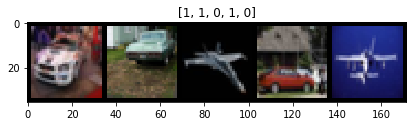

In [8]:
from torchhk.vis import *
train_img, train_label = iter(train_loader).next()
ax = init_plot(title=train_label.numpy().tolist())
plot_img(ax, train_img, ncols=5)